In [1]:
##################### HAWKISH AND DOVISH ANALYSIS  ##############
# Análisis del sentimiento de la política monetaria del BANXICO #
##################febrero 2018 a febrero 2024 ##################

In [2]:
%reset -sf #removes variables
%clear

Don't know how to reset  #removes, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details



In [3]:
import unicodedata
import re #used to clean text
import nltk #used to perform NLP
from nltk.corpus import stopwords #Importing stopwords
from nltk.stem.porter import PorterStemmer #Keeping the root of the words
from nltk import ngrams
import pdfplumber
import os
from collections import Counter
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import collections

#  nltk.download('stopwords')

def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: 
        pass
    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(text)

def flatten(t):
    return [item for sublist in t for item in sublist]

In [4]:
total_list = []

In [5]:
for file in os.listdir('./Reportes'):
    print(file)
    filename = os.fsdecode(file)
    
    if filename.endswith('.pdf'):
        current_pdf = []
        
        with pdfplumber.open('./Reportes/'+file) as pdf:
            for pdf_page in pdf.pages:
                single_page_text = pdf_page.extract_text()
                current_pdf.append(single_page_text)
        current_pdf = [sheet for sheet in current_pdf if sheet is not None]
        current_pdf = [sheet.replace('\n','') for sheet in current_pdf]
        current_pdf = ' '.join(current_pdf)
    
        corpus = []
        corpus_joined = []
    
        # Remove accents
        current_pdf = strip_accents(current_pdf)
        # Remove numbers
        current_pdf = re.sub('[^a-zA-Z]', ' ', current_pdf)
        # Convert to lowercase
        current_pdf = current_pdf.lower()
        # Divide words
        current_pdf = current_pdf.split()
        # Instanciating porter steamer
        ps = PorterStemmer()
        # Remove spanish stopwords
        current_pdf = [ps.stem(word) for word in current_pdf if not word in set(stopwords.words('spanish'))]    

        counts = Counter(current_pdf)

        listas_finales = pd.DataFrame(counts.most_common(10000))
        lista_finales_tabla_ = listas_finales.set_index([0])
    
    #####HAWKISH WORDS #### 
        lista_finales_tabla_aceler=lista_finales_tabla_.loc[[s.startswith('aceler') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_ajust=lista_finales_tabla_.loc[[s.startswith('ajust') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_alto=lista_finales_tabla_.loc[[s.startswith('alto') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_alta=lista_finales_tabla_.loc[[s.startswith('alta') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_alza=lista_finales_tabla_.loc[[s.startswith('alza') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_aprecia=lista_finales_tabla_.loc[[s.startswith('aprecia') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_apret=lista_finales_tabla_.loc[[s.startswith('apret') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_arriba=lista_finales_tabla_.loc[[s.startswith('arriba') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_ascend=lista_finales_tabla_.loc[[s.startswith('ascend') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_aument=lista_finales_tabla_.loc[[s.startswith('aument') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_creci=lista_finales_tabla_.loc[[s.startswith('creci') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_eleva=lista_finales_tabla_.loc[[s.startswith('eleva') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_estimul=lista_finales_tabla_.loc[[s.startswith('estimul') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_expan=lista_finales_tabla_.loc[[s.startswith('expan') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_forta=lista_finales_tabla_.loc[[s.startswith('forta') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_fuert=lista_finales_tabla_.loc[[s.startswith('fuert') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_impuls=lista_finales_tabla_.loc[[s.startswith('impuls') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_incentiv=lista_finales_tabla_.loc[[s.startswith('incentiv') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_increment=lista_finales_tabla_.loc[[s.startswith('increment') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_mayor=lista_finales_tabla_.loc[[s.startswith('mayor') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_positiv=lista_finales_tabla_.loc[[s.startswith('positiv') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_rapid=lista_finales_tabla_.loc[[s.startswith('rapid') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_reforz=lista_finales_tabla_.loc[[s.startswith('reforz') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_refuerz=lista_finales_tabla_.loc[[s.startswith('refuerz') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_restrin=lista_finales_tabla_.loc[[s.startswith('restrin') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_subir=lista_finales_tabla_.loc[[s.startswith('subir') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_subio=lista_finales_tabla_.loc[[s.startswith('subio') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_subieron=lista_finales_tabla_.loc[[s.startswith('subieron') for s in lista_finales_tabla_.index] ]

#####DOVISH WORDS ####
        lista_finales_tabla_caid=lista_finales_tabla_.loc[[s.startswith('caid') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_holgura=lista_finales_tabla_.loc[[s.startswith('holgura') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_bajo=lista_finales_tabla_.loc[[s.startswith('bajo') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_baja=lista_finales_tabla_.loc[[s.startswith('baja') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_depreci=lista_finales_tabla_.loc[[s.startswith('depreci') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_ampli=lista_finales_tabla_.loc[[s.startswith('ampli') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_abajo=lista_finales_tabla_.loc[[s.startswith('abajo') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_descend=lista_finales_tabla_.loc[[s.startswith('descend') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_disminu=lista_finales_tabla_.loc[[s.startswith('disminu') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_decreci=lista_finales_tabla_.loc[[s.startswith('decreci') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_limit=lista_finales_tabla_.loc[[s.startswith('limit') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_contrac=lista_finales_tabla_.loc[[s.startswith('contrac') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_debil=lista_finales_tabla_.loc[[s.startswith('debil') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_atenu=lista_finales_tabla_.loc[[s.startswith('atenu') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_desincent=lista_finales_tabla_.loc[[s.startswith('desincent') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_decre=lista_finales_tabla_.loc[[s.startswith('decre') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_meno=lista_finales_tabla_.loc[[s.startswith('meno') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_negativ=lista_finales_tabla_.loc[[s.startswith('negativ') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_lent=lista_finales_tabla_.loc[[s.startswith('lent') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_redu=lista_finales_tabla_.loc[[s.startswith('redu') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_deterior=lista_finales_tabla_.loc[[s.startswith('deterior') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_reactiv=lista_finales_tabla_.loc[[s.startswith('reactiv') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_bajar=lista_finales_tabla_.loc[[s.startswith('bajar') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_incertidumb=lista_finales_tabla_.loc[[s.startswith('incertidumb') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_inciert=lista_finales_tabla_.loc[[s.startswith('inciert') for s in lista_finales_tabla_.index] ]
        lista_finales_tabla_recort=lista_finales_tabla_.loc[[s.startswith('recort') for s in lista_finales_tabla_.index] ]


        hawkish_t = pd.concat([lista_finales_tabla_aceler,lista_finales_tabla_ajust, lista_finales_tabla_alto, lista_finales_tabla_alta, lista_finales_tabla_alza, lista_finales_tabla_aprecia, lista_finales_tabla_apret, lista_finales_tabla_arriba, lista_finales_tabla_ascend, lista_finales_tabla_aument, lista_finales_tabla_creci, lista_finales_tabla_eleva, lista_finales_tabla_estimul, lista_finales_tabla_expan, lista_finales_tabla_forta, lista_finales_tabla_fuert, lista_finales_tabla_impuls, lista_finales_tabla_incentiv, lista_finales_tabla_increment, lista_finales_tabla_mayor, lista_finales_tabla_positiv, lista_finales_tabla_rapid, lista_finales_tabla_reforz, lista_finales_tabla_refuerz, lista_finales_tabla_restrin, lista_finales_tabla_subir, lista_finales_tabla_subio, lista_finales_tabla_subieron])
        dovish_t = pd.concat([lista_finales_tabla_caid,lista_finales_tabla_holgura, lista_finales_tabla_bajo, lista_finales_tabla_baja, lista_finales_tabla_depreci, lista_finales_tabla_ampli, lista_finales_tabla_abajo, lista_finales_tabla_descend, lista_finales_tabla_disminu, lista_finales_tabla_decreci, lista_finales_tabla_limit, lista_finales_tabla_contrac, lista_finales_tabla_debil, lista_finales_tabla_atenu, lista_finales_tabla_desincent, lista_finales_tabla_decre, lista_finales_tabla_meno, lista_finales_tabla_negativ, lista_finales_tabla_lent, lista_finales_tabla_redu, lista_finales_tabla_deterior, lista_finales_tabla_reactiv, lista_finales_tabla_bajar, lista_finales_tabla_incertidumb, lista_finales_tabla_inciert, lista_finales_tabla_recort])

        m_li = [file,hawkish_t.sum().values,dovish_t.sum().values]
        total_list.append(m_li)
        

        
        
        

Minuta100_18_05_23.pdf
Minuta101_22_06_23.pdf
Minuta102_10_08_23.pdf
Minuta103_28_09_23.pdf
Minuta104_09_11_23.pdf
Minuta105_14_12_23.pdf
Minuta106_08_02_24.pdf
Minuta57_08_02_18_a.pdf
Minuta58_12_04_18.pdf
Minuta59_17_05_18.pdf
Minuta60_21_06_18_a.pdf
Minuta61_02_08_18.pdf
Minuta62_04_10_18.pdf
Minuta63_15_11_18_a.pdf
Minuta64_20_12_18_a.pdf
Minuta65_07_02_19.pdf
Minuta66_28_03_19.pdf
Minuta67_16_05_19.pdf
Minuta68_27_06_19.pdf
Minuta69_15_08_19_d.pdf
Minuta70_26_09_19_d.pdf
Minuta71_14_11_19_d.pdf
Minuta72_19_12_19_d.pdf
Minuta73_13_02_20_d.pdf
Minuta74_20_03_20_d.pdf
Minuta75_21_04_20_d.pdf
Minuta76_14_05_20_d.pdf
Minuta77_25_06_20_d.pdf
Minuta78_13_08_20_d.pdf
Minuta79_24_09_20_d.pdf
Minuta80_12_11_20.pdf
Minuta81_17_12_20.pdf
Minuta82_11_02_21_d.pdf
Minuta83_25_04_21.pdf
Minuta84_13_05_21.pdf
Minuta85_24_06_21_a.pdf
Minuta86_12_08_21_a.pdf
Minuta87_30_09_21_a.pdf
Minuta88_11_11_21_a.pdf
Minuta89_16_12_21_a.pdf
Minuta90_10_02_22_a.pdf
Minuta91_24_03_22_a.pdf
Minuta92_12_05_22_a.pdf

In [6]:
base_final = pd.DataFrame.from_records(total_list)

In [7]:
base_final["minutas"] = base_final[0]
base_final["hawkish"] = base_final[1]
base_final["dovish"] = base_final[2]
base_final.drop([0,1,2], axis='columns', inplace=True)


In [8]:
to_minutas = pd.read_csv("to_minutas.csv")

In [9]:
base = (pd.merge(base_final, to_minutas, on='minutas'))
base =base.sort_values(by=['no'])

In [10]:
base['haw/dov']= base['hawkish']/base['dovish']

In [11]:
haw_dov=base['haw/dov']
flat_list = []
for xs in haw_dov:
    for x in xs:
        flat_list.append(x)        
flat_list=pd.DataFrame(flat_list)
haw_dov = flat_list.rename(columns={0: 'haw_dov'})
haw_dov['no']=range(1,51,1)
haw_dov=(pd.merge(haw_dov, to_minutas, on='no'))
haw_dov=haw_dov.drop(['minutas', 'minuta', 'Unnamed: 6'], axis=1)
haw_dov['haw_dov'] = haw_dov.pop('haw_dov')
haw_dov
#haw_dov.dtypes
#haw_dov.describe()

,no,fecha,to,to_cambio,haw_dov
0,1,08/02/2018,7.50,0.25,2.025000
1,2,12/04/2018,7.50,0.00,1.442786
2,3,17/05/2018,7.50,0.00,1.729885
3,4,21/06/2018,7.75,0.25,1.822086
4,5,02/08/2018,7.75,0.00,1.782857
5,6,04/10/2018,7.75,0.00,2.237410
6,7,15/11/2018,8.00,0.25,1.703704
7,8,20/12/2018,8.25,0.25,1.355932
8,9,07/02/2019,8.25,0.00,1.166667
9,10,28/03/2019,8.25,0.00,1.170370


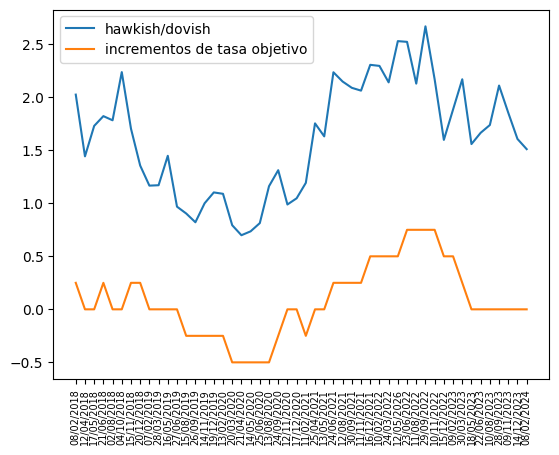

In [12]:
plt.plot(haw_dov['fecha'], base['haw/dov'], label = "hawkish/dovish")
plt.plot(haw_dov['fecha'], base['to_cambio'], label = "incrementos de tasa objetivo")

plt.legend()
plt.xticks(fontsize=7,rotation=90)
plt.show()

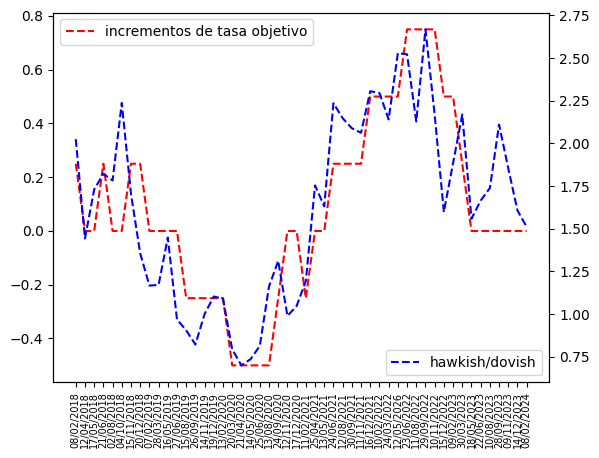

In [13]:
fig, ax = plt.subplots()
plt.plot(haw_dov['fecha'], base['to_cambio'],  '--r', label = "incrementos de tasa objetivo")
plt.legend(loc='upper left')

plt.xticks(fontsize=7,rotation=90)


ax2 = ax.twinx()
plt.plot(haw_dov['fecha'], base['haw/dov'],  '--b', label = "hawkish/dovish")
plt.legend(loc='lower right')
plt.xticks(fontsize=7, rotation=90)

plt.show()


In [14]:
#haw_dov.to_csv("haw_dov.csv", index=False)

In [ ]:
###### AR, MA, ARMA, ARIMA, SARIMA models ######


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

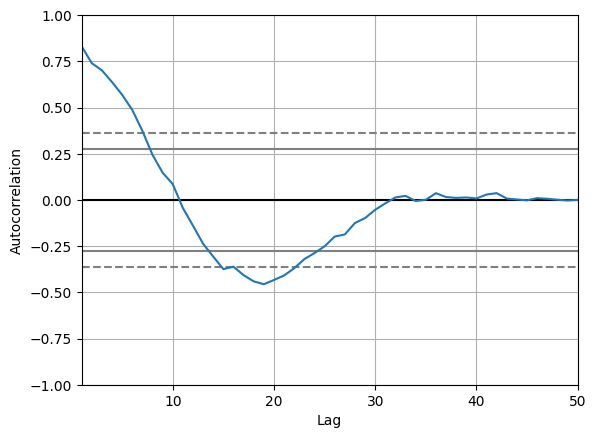

In [26]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(haw_dov['haw_dov'])

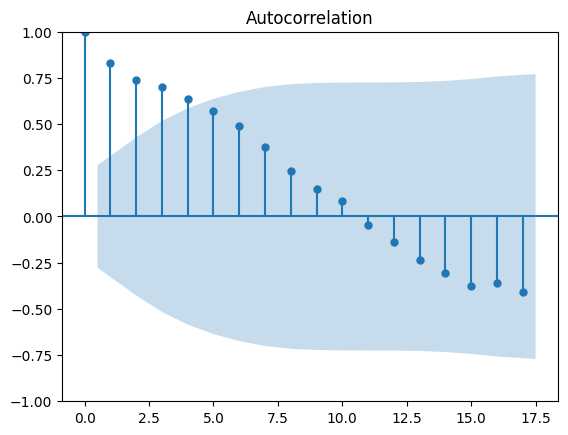

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(haw_dov['haw_dov'])
plt.show()

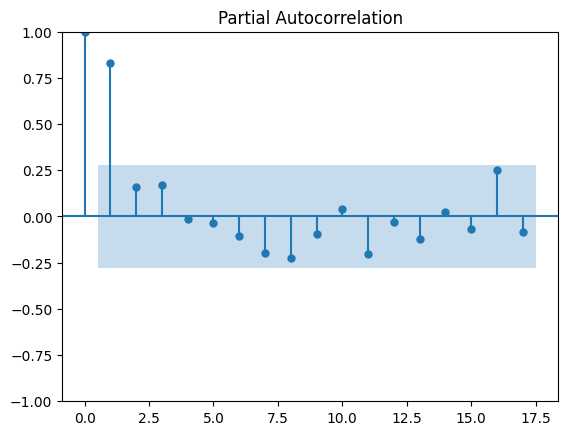

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(haw_dov['haw_dov'], method='ywm')
plt.show()

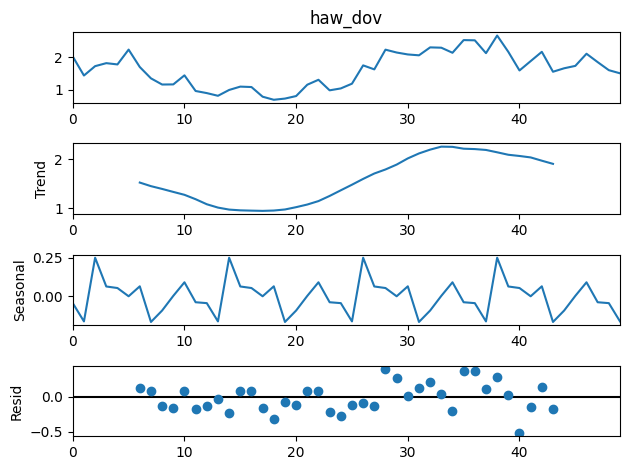

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(haw_dov['haw_dov'],model='additive',period=12)
decomposition.plot()
plt.show()

In [34]:
#Augmented Dickey-Fuller Test
#Ho:the series is non-stationary (p-value<0.05 to reject Ho)
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(haw_dov.haw_dov, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.1177544654688067
2. P-Value :  0.23743562893394304
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 49
5. Critical Values :
	 1% :  -3.5714715250448363
	 5% :  -2.922629480573571
	 10% :  -2.5993358475635153


In [62]:
#### ARIMA ######
###   Difference (n)
data_diff=haw_dov['haw_dov'].diff(periods=4)

dftest = adfuller(data_diff.dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.466206817613449
2. P-Value :  0.008898591783447072
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 45
5. Critical Values :
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937


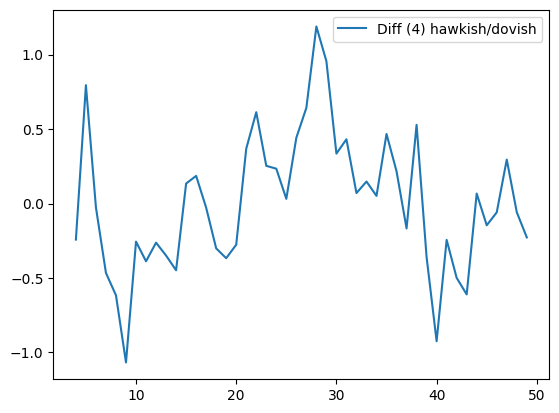

In [63]:
plt.plot(data_diff, label = "Diff (4) hawkish/dovish")
plt.legend()
plt.show()

In [65]:
import pmdarima as pmd

model=pmd.auto_arima(data_diff.dropna(),start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=56.198, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=57.490, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=55.175, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=54.198, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=58.195, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=58.194, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=55.490, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=53.214, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=55.175, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=57.175, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=49.381, Time=0.09 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=51.381, Time=

In [35]:
###### SARIMA #########
## Original serie
import pmdarima as pmd

model=pmd.auto_arima(haw_dov['haw_dov'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=31.697, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=27.195, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=29.304, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=28.112, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25.252, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=29.194, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=29.194, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=27.345, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=26.220, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=27.831, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.713 seconds


In [152]:
###### SARIMA #########
## log serie to control variance
import math
serie1=haw_dov['haw_dov']
serie1=pd.to_numeric(serie1, errors='coerce').astype('float')

#logserie=math.log(serie1)

#logserie

In [ ]:
import pmdarima as pmd
model=pmd.auto_arima(logserie,start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)
